(901, 1600, 3)


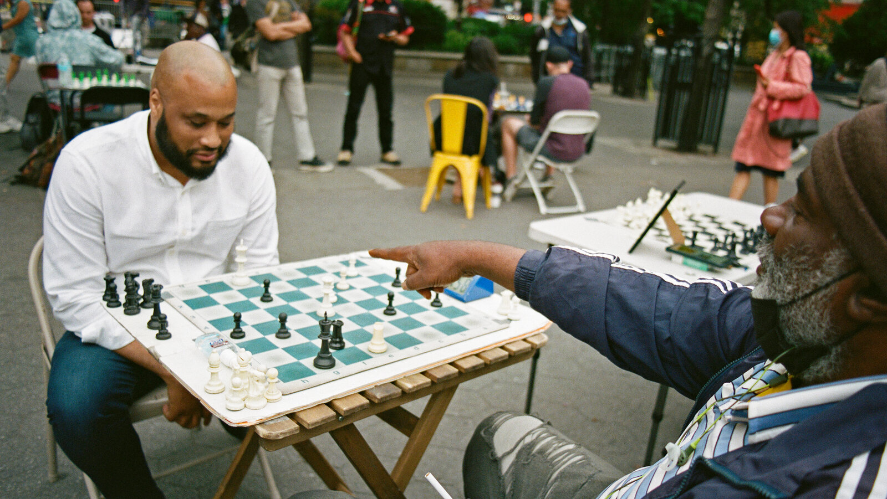

In [138]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('./test5.jpg')
print(img.shape)
# img = cv2.resize(img, (500, 500), interpolation=cv2.INTER_AREA)
scale_percent = 500/img.shape[0]
img = cv2.resize(img, (int(img.shape[1] * scale_percent), int(img.shape[0] * scale_percent)))
cv2_imshow(img)

scale_percent = 500/img.shape[0]
img = cv2.resize(img, (int(img.shape[1] * scale_percent), int(img.shape[0] * scale_percent)))

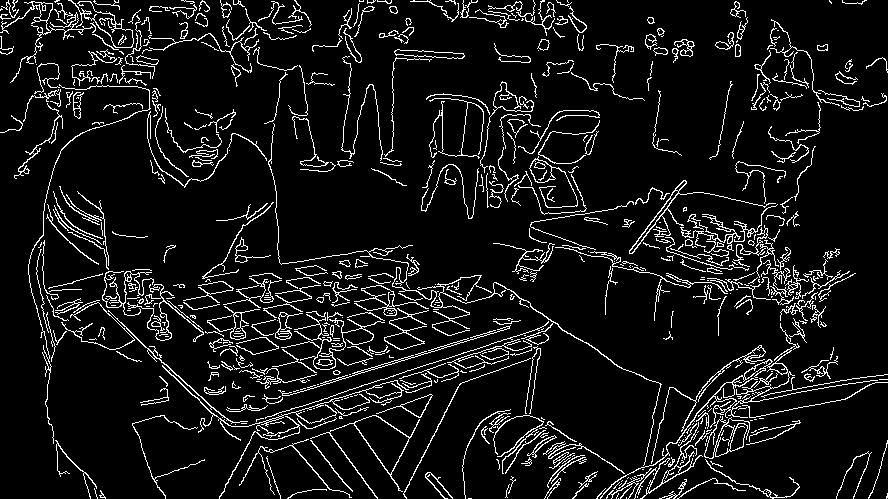

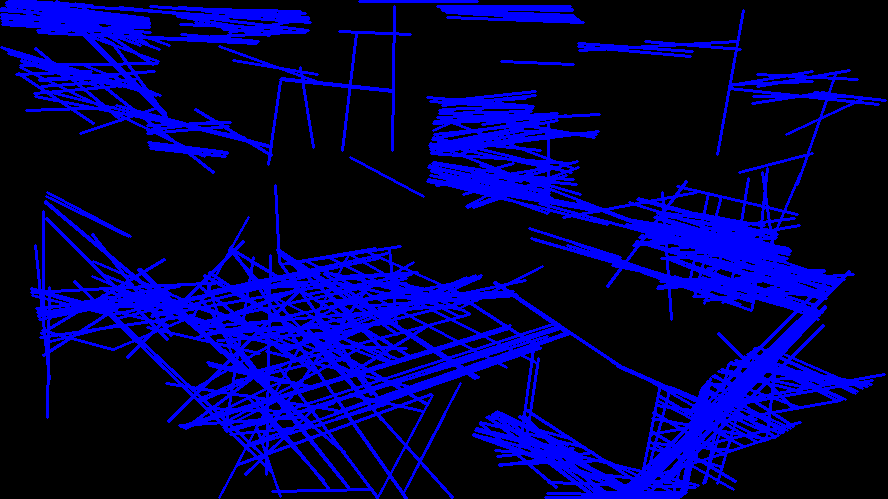

In [139]:
def edge_detect(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  low_threshold = 70
  high_threshold = 200
  edges = cv2.Canny(img_gray, low_threshold, high_threshold)
  return edges

def get_lines(img):
  rho = 1  # distance resolution in pixels of the Hough grid
  theta = np.pi / 180  # angular resolution in radians of the Hough grid
  threshold = 50  # minimum number of votes (intersections in Hough grid cell)
  min_line_length = 70  # minimum number of pixels making up a line
  max_line_gap = 25  # maximum gap in pixels between connectable line segments

  # Run Hough on edge detected image
  # Output "lines" is an array containing endpoints of detected line segments
  lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),
                      min_line_length, max_line_gap)
  return lines

def show_lines(img, lines):
  line_image = np.copy(img) * 0  # creating a blank to draw lines on
  for i,line in enumerate(lines):
    # print(line)
    line_id[i] = line[0]
    if len(line) > 0:
      x1, y1, x2, y2 = line[0]
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)
  cv2_imshow(line_image)
  
img_edge = edge_detect(img)
W = img_edge.shape[0]
H = img_edge.shape[1]
lines = get_lines(img_edge)
line_id = [None] * len(lines) # REFACTOR THIS
cv2_imshow(img_edge)
show_lines(img, lines)

In [140]:
len(line_id)

504

In [141]:
parent = [-1 ]* len(line_id)
size =  [-1 ]* len(line_id)
def make_set(v):
  parent[v] = v
  size[v] = 1

def find_set(v):
  if(v == parent[v]):
    return v
  parent[v] = find_set(parent[v])
  return parent[v]

def union_sets(a,b):
  a = find_set(a)
  b = find_set(b)
  if a != b:
    if(size[a] < size[b]):
      a,b = b,a 
    parent[b] = a
    size[a] += size[b]


In [142]:
from numpy.linalg import norm
import math
import time

def dist(p, p1, p2):
  # t6 = time.time()
  p1p2 = [p2[0] - p1[0], p2[1] - p1[1]]
  p1p = [p[0] - p1[0], p[1] - p1[1]]
  cross = p1p2[0] * p1p[1] - p1p2[1] * p1p[0]
  length = math.sqrt(p1p2[0]**2 + p1p2[1]**2)
  ret = abs(cross)/length
  # t7 = time.time()
  # print(t7-t6)
  return ret

def similar(l1, l2):
  l1x1, l1y1, l1x2, l1y2 = l1
  l2x1, l2y1, l2x2, l2y2 = l2

  #todo: come up with better heuristic
  # t6 = time.time()
  dx1 = dist([l2x1, l2y1], [l1x1, l1y1], [l1x2, l1y2])
  dx2 = dist([l2x2, l2y2], [l1x1, l1y1], [l1x2, l1y2])
  dy1 = dist([l1x2, l1y2], [l2x1, l2y1], [l2x2, l2y2])
  dy2 = dist([l1x1, l1y1], [l2x1, l2y1], [l2x2, l2y2])
  # t7 = time.time()
  # print(t7-t6)
  gamma = 0.25*(dx1 + dx2 + dy1 + dy2) + 0.01
  p = 2
  omega = np.pi/2 * 1/((W*H)**(1/4))
  t_delta = p*omega
  a = math.sqrt((l1y2-l1y1)**2 + (l1x2-l1x1)**2)
  b = math.sqrt((l2y2-l2y1)**2 + (l2x2-l2x1)**2)
  delta = (a + b) * t_delta
  sim = (a/gamma > delta or b/gamma > delta)
  return sim

4.85822057723999


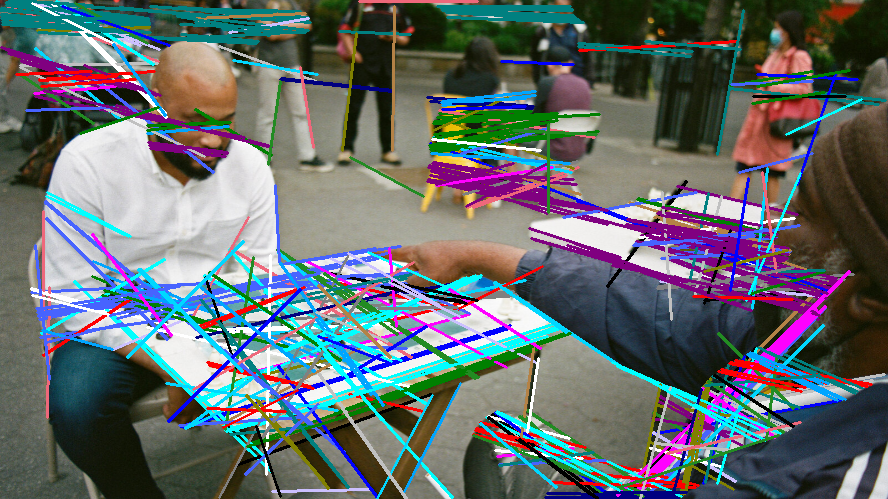

[0, 0, 2, 3, 2, 5, 6, 7, 8, 6, 10, 11, 6, 13, 14, 15, 10, 14, 14, 19, 20, 10, 22, 6, 13, 20, 14, 14, 6, 29, 6, 31, 32, 33, 34, 29, 14, 29, 38, 39, 31, 41, 6, 43, 44, 3, 29, 29, 14, 49, 29, 51, 52, 53, 6, 22, 6, 57, 14, 31, 60, 38, 62, 6, 29, 65, 2, 29, 68, 6, 70, 29, 14, 73, 74, 75, 76, 2, 78, 79, 29, 57, 82, 14, 10, 85, 86, 87, 6, 87, 6, 91, 2, 29, 6, 95, 96, 62, 29, 14, 29, 101, 41, 103, 6, 105, 14, 3, 74, 109, 38, 3, 6, 113, 29, 32, 6, 117, 14, 29, 120, 6, 85, 15, 6, 10, 44, 6, 41, 62, 130, 85, 132, 133, 134, 135, 10, 143, 6, 139, 52, 6, 142, 143, 144, 6, 143, 6, 6, 149, 87, 34, 6, 52, 154, 14, 156, 6, 158, 159, 160, 161, 162, 163, 164, 82, 143, 167, 29, 29, 29, 171, 172, 14, 6, 175, 176, 177, 57, 10, 180, 14, 6, 183, 29, 29, 29, 187, 29, 109, 190, 191, 6, 6, 6, 6, 196, 197, 143, 199, 200, 143, 202, 6, 204, 6, 87, 14, 208, 29, 210, 142, 82, 57, 214, 142, 216, 217, 14, 219, 85, 221, 82, 143, 224, 6, 29, 227, 6, 229, 6, 8, 62, 29, 234, 10, 52, 65, 238, 3, 29, 20, 242, 135, 244, 14, 24

In [143]:
from collections import defaultdict
st= time.time()

for id in range(len(line_id)):
  make_set(id)

t2 = time.time()
for id1 in range(len(line_id)):
  for id2 in range(id1, len(line_id)):
    if similar(line_id[id1], line_id[id2]):  
      union_sets(id1, id2)
t3 = time.time()
print(t3-t2)

colors = [
    (255, 0, 0),    # Red
    (255, 165, 0),  # Orange
    (255, 255, 0),  # Yellow
    (0, 128, 0),    # Green
    (0, 128, 128),  # Teal
    (0, 0, 255),    # Blue
    (128, 0, 128),  # Purple
    (255, 0, 255),  # Magenta
    (128, 0, 0),    # Maroon
    (128, 128, 0),  # Olive
    (128, 128, 128),# Grey
    (192, 192, 192),# Silver
    (255, 255, 255),# White
    (0, 0, 0),      # Black
    (255, 99, 71),  # Tomato
    (255, 192, 203),# Pink
    (255, 215, 0),  # Gold
    (34, 139, 34),  # Forest green
    (70, 130, 180), # Steel blue
    (123, 104, 238) # Medium purple
]

line_image2 = np.copy(img)

groups = defaultdict(list)
for id in range(len(line_id)):
  group_id = find_set(id)
  c = colors[group_id%len(colors)]
  line = line_id[id]
  groups[group_id].append(line)
  x1, y1, x2, y2 = line
  cv2.line(line_image2,(x1,y1),(x2,y2),c,2)

cv2_imshow(line_image2)

print(parent)
print(groups)

In [144]:
t4 = time.time()
print(similar([0,0,1,1], [2.2,2.3,3,3]))
t5 = time.time()
print(t5-t4)

True
0.0001728534698486328


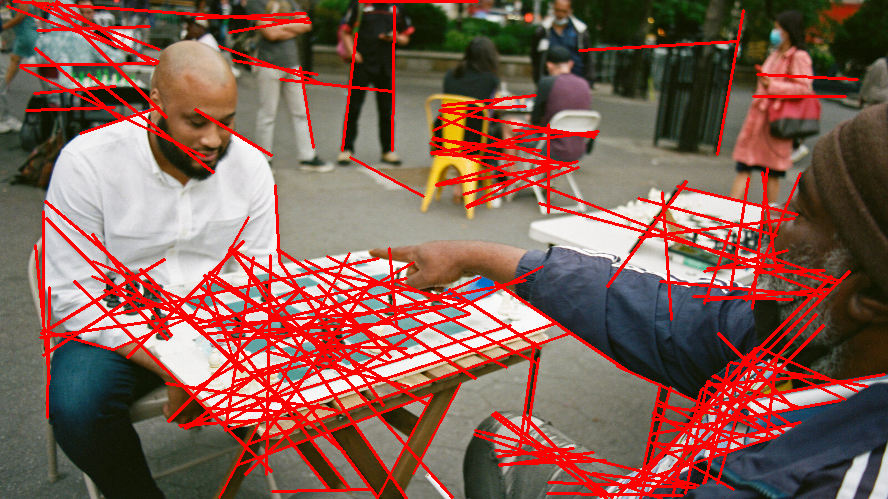

In [145]:
line_image3 = np.copy(img)
merged_lines = []
for group_id in groups:
  group = groups[group_id]
  max_len = 0
  max_idx = 0
  for i,line in enumerate(group):
    length = (line[3]-line[1])**2 + (line[2]-line[0])**2
    if length > max_len:
      max_len = length
      max_idx = i
  line = group[max_idx]
  merged_lines.append(line)
  cv2.line(line_image3,(line[0],line[1]),(line[2],line[3]),(0,0,255),2)
  
cv2_imshow(line_image3)

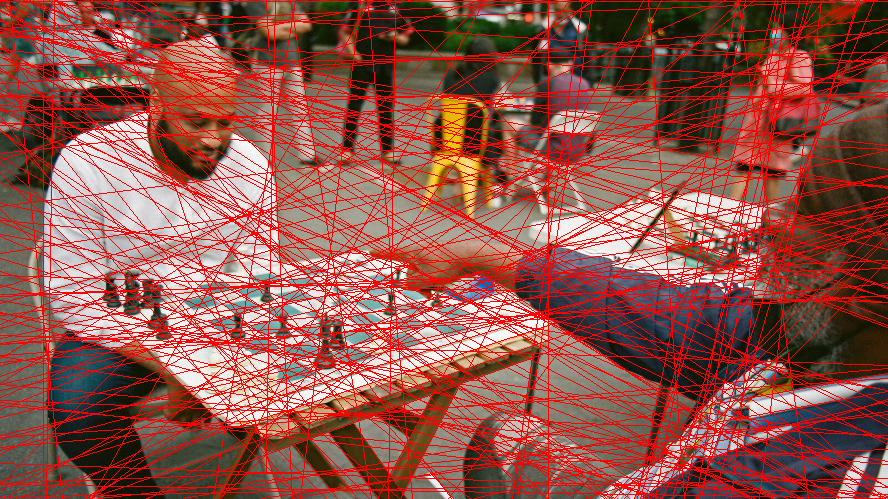

In [146]:
from pickle import TUPLE1
class Line():
  def __init__(self, point, vector):
    self.point = point
    self.vector = vector

full_lines = []
def magnitude(v):
  return math.sqrt(v[0]**2 + v[1]**2)

def find_intersection(l1, l2):
  x1,y1 = l1.point
  u1,v1 = l1.vector
  x2,y2 = l2.point
  u2,v2 = l2.vector
  det = -u1*v2 + v1*u2
  if abs(det) < 0.0000001: 
    return 1000000000, [1000000000, 1000000000]
  t = (-v2*(x2-x1) + u2*(y2-y1))/det
  return [x1 + t*u1, y1 + t*v1]

for line in merged_lines:
  d = [line[2] - line[0], line[3] - line[1]]
  full_lines.append(Line([line[0], line[1]], d))

line_image4 = np.copy(img)

for line in full_lines:
  cv2.line(line_image4,(int(line.point[0]+500*line.vector[0]), int(line.point[1]+500*line.vector[1])),(int(line.point[0] - 500*line.vector[0]), int(line.point[1] - 500*line.vector[1])),(0,0,255),1)
cv2_imshow(line_image4)


In [147]:
import torch
from torchvision import transforms
model = torch.load('resnet18.pth', map_location=torch.device('cpu'))
model.eval()

def predict_image(im):
  edges = edge_detect(im)
  edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
  pred = model(transforms.ToTensor()(edges).unsqueeze(0))
  prob = torch.sigmoid(pred).item()
  value = 1 if prob > 0.5 else 0
  return value

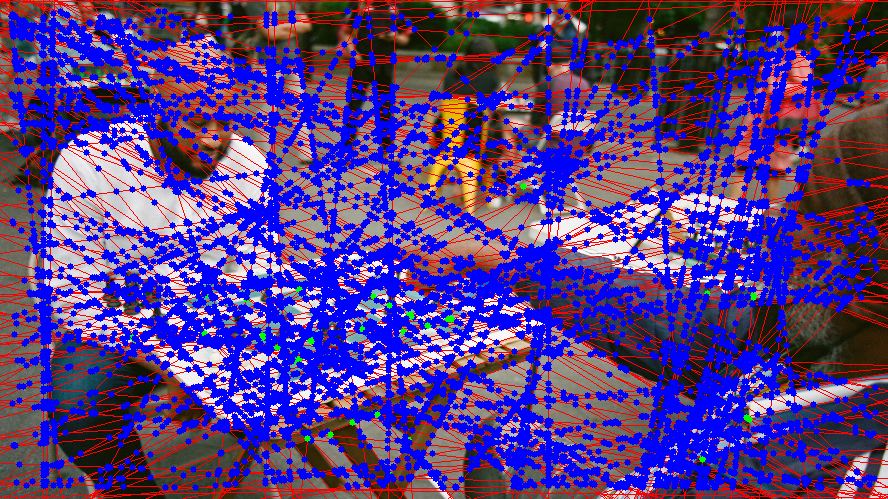

In [148]:
inter_images = []

for i in range(len(full_lines)):
  for j in range(i+1, len(full_lines)):
    point_inter = find_intersection(full_lines[i], full_lines[j])
    if(point_inter[0] >= 11 and point_inter[0] < H-11 and point_inter[1] >= 11 and point_inter[1] < W-11):
      
      roi = img[int(point_inter[1])-10: int(point_inter[1])+11, int(point_inter[0])-10: int(point_inter[0])+11]
      if(len(roi) == 0):
        print("empty")
        print(point_inter[0], point_inter[1])
      inter_images.append(roi)

      is_lattice = predict_image(roi)
      if is_lattice == 1:
        cv2.circle(line_image4, (int(point_inter[0]), int(point_inter[1])), 3, (0, 255, 0), -1)
      else:
        cv2.circle(line_image4, (int(point_inter[0]), int(point_inter[1])), 3, (255, 0, 0), -1)
cv2_imshow(line_image4)

In [149]:
len(inter_images)

11157

In [150]:
for im in inter_images:
  gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  th = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,21,2)
  # cv2_imshow(th)
  # ret, corners = cv2.findChessboardCorners(th, (3,3), None)
  # cv2.drawChessboardCorners(th, (3,3), corners,ret)


In [151]:
# import torch
# from torchvision import transforms
# model = torch.load('resnet18.pth', map_location=torch.device('cpu'))
# model.eval()
# for im in inter_images:
#   edges = edge_detect(im)
#   edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
#   cv2_imshow(edges)
#   pred = model(transforms.ToTensor()(edges).unsqueeze(0))
#   prob = torch.sigmoid(pred).item()
#   value = 1 if prob > 0.5 else 0
#   print(value)


# Intersection Classification